### This notebook guides the user regarding how to fetch map data for a specific/all location at runtime.


In [1]:
from windwatts_data import WTKLedClient1224

In [2]:
# Initialize object to the WTKLedClient1224
# Since the config file is in same directory "notebooks" as the ".ipynb" file, the below config path works.
wtk_1224_client = WTKLedClient1224(config_path='./1224_config.json')

Fetching results...: 3polls [00:03,  1.25s/polls]


#### Safe function for fetching map data.
fetch_windspeed_map_1224() is a safe function because it requires the user to specify all paramaters. This results in fetching one record from each of 2.51M files for each year. Even though its is an expensive operation resulting in scanning of around 7GB of data(for below query), there are other robust methods discussed in later notebooks which gives users more freedom in terms of parameters.

In [3]:
# Retrieving windspeed map for height 100m at specific year, month and hour.
df = wtk_1224_client.fetch_windspeed_map_1224(height=100,year=2001,hour=4,month=6)

Fetching results...: 1polls [00:00,  1.61polls/s]


Query result is stored at: s3://wtk-test-athena-results/e3d63b48-c654-47dd-a410-4496653c9e28.csv.


In [4]:
df

,windspeed_100m,index
0,7.36,000293
1,5.56,0001c3
2,8.12,000019
3,8.01,0002bb
4,6.31,0003af
...,...,...
2599772,3.01,279e95
2599773,12.49,272b0c
2599774,8.31,27286d
2599775,1.78,274b5e


In [5]:
# mapping index to latitude and longitude
df_mapped = wtk_1224_client.map_index_to_coordinates(df)

In [6]:
df_mapped

,windspeed_100m,index,latitude,longitude
0,7.36,000293,55.523056,-168.763410
1,5.56,0001c3,62.235836,175.833310
2,8.12,000019,51.694920,-163.010040
3,8.01,0002bb,56.561115,-170.612530
4,6.31,0003af,62.204067,176.064480
...,...,...,...,...
2599772,3.01,279e95,8.985375,-68.517456
2599773,12.49,272b0c,11.791409,-69.311920
2599774,8.31,27286d,19.073448,-65.305115
2599775,1.78,274b5e,8.927039,-70.131530


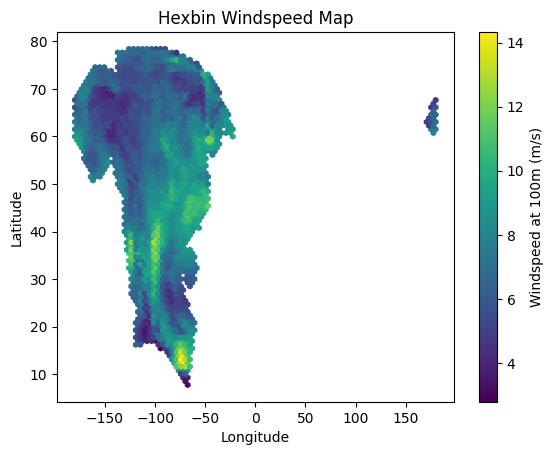

In [7]:
# Plotting windspeed map
import matplotlib.pyplot as plt
import numpy as np

plt.hexbin(df_mapped['longitude'], df_mapped['latitude'], C=df_mapped['windspeed_100m'], gridsize=80, cmap='viridis')
plt.colorbar(label='Windspeed at 100m (m/s)')
plt.title('Hexbin Windspeed Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [8]:
# Fetching winddirection map.
df_wd = wtk_1224_client.fetch_winddirection_map_1224(height=100,year=2001,hour=4,month=6)


Fetching results...: 1polls [00:00,  1.58polls/s]


Query result is stored at: s3://wtk-test-athena-results/c41643df-70f3-4fbe-af4b-79f1b7bcae8d.csv.


In [9]:
df_wd

,winddirection_100m,index
0,177.28,00012e
1,253.92,00008b
2,198.53,0003b2
3,188.02,000171
4,254.20,00029b
...,...,...
2599772,82.51,278788
2599773,82.12,2785a6
2599774,62.54,278877
2599775,123.00,2786a1


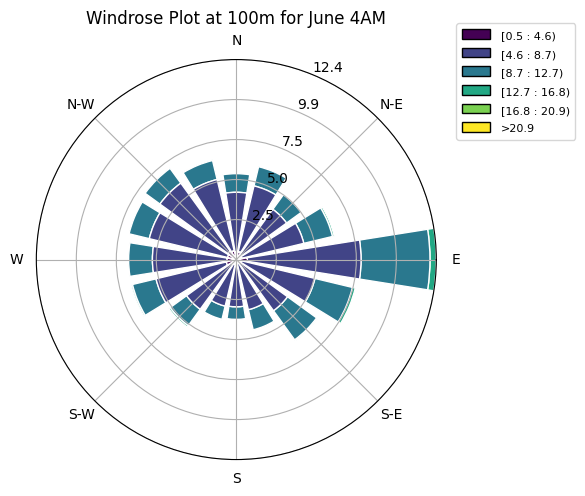

In [10]:
from windrose import WindroseAxes
# Create windrose plot
fig = plt.figure(figsize=(5, 5))  # Width=10, Height=8 in inches
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df_wd['winddirection_100m'], df['windspeed_100m'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=(1.05, 0.8)) 
plt.suptitle("Windrose Plot at 100m for June 4AM", fontsize=12, y=1)  
plt.show()